In [ ]:
import math
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy.interpolate import interp1d
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(suppress=True) # don't use scientific notation


#Curve fitting


In [ ]:
# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y


[1.57146952, 4.16665826, 7.89363503, 16.00373932, 7.41424006, 3.4188344, 1.72830558]


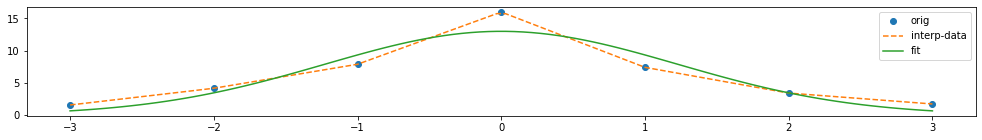

In [ ]:
xdata = np.linspace(-3,3,7)
ydata = [ 1.57146952,  4.16665826,  7.89363503, 16.00373932,  7.41424006,  3.4188344,  1.72830558]
#ydata = [1.25819152, 3.48870426, 6.06803503, 7.92524632, 5.88581506, 2.8635734, 1.51751658]

f = interp1d(xdata, ydata, kind='linear')

x = np.linspace(-3,3,100)


#mean = sum(x * f(x))
#sigma = sum(f(x) * (x - mean)**2)
  

parameters, covariance = curve_fit(Gauss, x, f(x))#, p0 = [1, mean, sigma])
  

fit_A = parameters[0]
fit_B = parameters[1]
  
fit_y = Gauss(x, fit_A, fit_B)

plt.figure(figsize=(17,2))
plt.plot(xdata, ydata, 'o', label='orig')

plt.plot(x, f(x), '--', label='interp-data')

plt.plot(x, fit_y, '-', label='fit')
plt.legend()
print(ydata)


# Minimze


In [ ]:
data = np.load('/content/drive/MyDrive/mil/data/analytics/data.npy')
#124345 #peak
#160386 #flat

In [ ]:
LENGTH = np.linalg.norm(data[160386,3,0,:] - data[160386,3,6,:])
def f(p, a, b, a_, b_):
  h = np.sqrt(np.square(b) - np.square(a))
  h_ = np.sqrt(np.square(b_) - np.square(a_))
  delta = h_/a_ * LENGTH

  err = (h/a * p[0]) - p[1]
  err_ = -1 * (h_/a_ * p[0]) + delta - p[1]
  return np.average(err + err_)

In [ ]:
a = np.linalg.norm(data[160386,3,0,:] - data[160386,3,1,:])
b = np.linalg.norm(data[124345,3,0,:] - data[124345,3,1,:])
a_ = np.linalg.norm(data[160386,3,5,:] - data[160386,3,6,:])
b_ = np.linalg.norm(data[124345,3,5,:] - data[124345,3,6,:])

print(a, b, a_, b_)

16.81043461342942 17.161611799241175 18.845048686236524 19.085484817594637


In [ ]:
#Calculate x and y of pressure point
h = math.sqrt(b**2 - a**2)
h_ = math.sqrt(b_**2 - a_**2)
x = (h_ * LENGTH) / (h_ + h)
y = h/a*x

print(x,y)


51.69202905426842 10.621079008883012


In [ ]:
minimize(f, (LENGTH/2,10), args=(a,b,a_,b_))

      fun: -2068.7451713238543
 hess_inv: array([[-2.80149823e+06,  1.23908819e+08],
       [ 1.23908819e+08, -5.48042106e+09]])
      jac: array([ 0.04522705, -2.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 348
      nit: 1
     njev: 112
   status: 2
  success: False
        x: array([  32.02977217, 1043.97575843])

In [ ]:
f((x,y), a, b, a_, b_)

-1.1467095245899923

In [ ]:
popt, _ = curve_fit(f,[a]*100,[b]*100)
print(popt)

[0.17301356 0.84204457]


In [ ]:
f(a, 0.17301356, 0.84204457)

17.161611804163904